main goal is to establish an ROI for initial frame stabilizing and for choosing where to measure quality

let's start with some somple thresholding since we are dealing with

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
# read in test image
jupiter = cv2.imread("../test/data/images/jupiter_stacked_blur.png")
jupiter.dtype

dtype('uint8')

In [32]:
moon = cv2.imread("../test/data/images/moon_stacked.jpg")
moon.dtype

dtype('uint8')

In [12]:
def plot(img, color = True):   
    # plt.figure(figsize=(10,10))
    if color:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap="gray")
    plt.show()

def plot_pair(img1, img2):
    # plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.show()

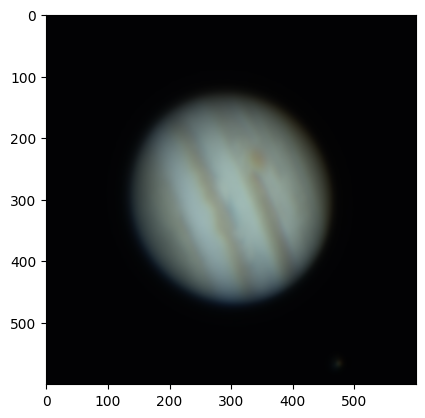

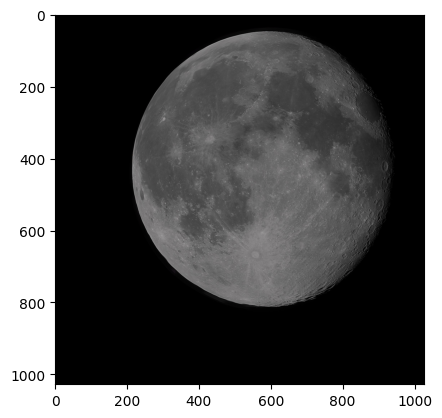

In [33]:
plot(jupiter)
plot(moon)

## Try basic methods

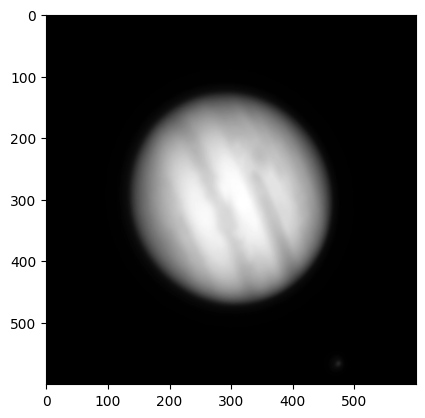

In [14]:
# try applying on luminance channel
jupiter_lum = cv2.cvtColor(jupiter, cv2.COLOR_BGR2Lab)[:, :, 0]

plot(jupiter_lum, False)

In [ ]:
# we will want to use this but for the test image isnt noisy

# # fast blur - goal is to get rid of high frequency noise
# luminance = cv2.GaussianBlur(luminance, (5, 5), 0)

uint8
(600, 600)


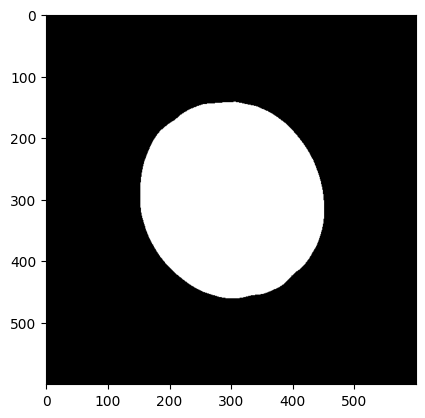

In [19]:
# otsu method
_, jupiter_mask = cv2.threshold(
    jupiter_lum, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
)
print(jupiter_mask.dtype)
print(jupiter_mask.shape)

plot(jupiter_mask, False)

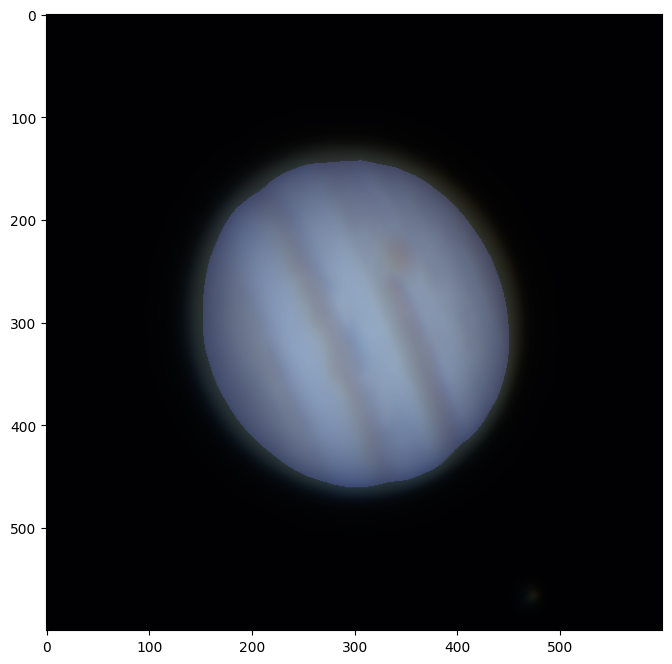

In [27]:
# view with an overlay of mask

color_mask = np.stack([jupiter_mask, jupiter_mask, jupiter_mask], axis=2)
color_mask[:, :, 0][jupiter_mask == 255] = 100
color_mask[:, :, 1][jupiter_mask == 255] = 100

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(jupiter, cv2.COLOR_BGR2RGB))
plt.imshow(color_mask, alpha=0.2)

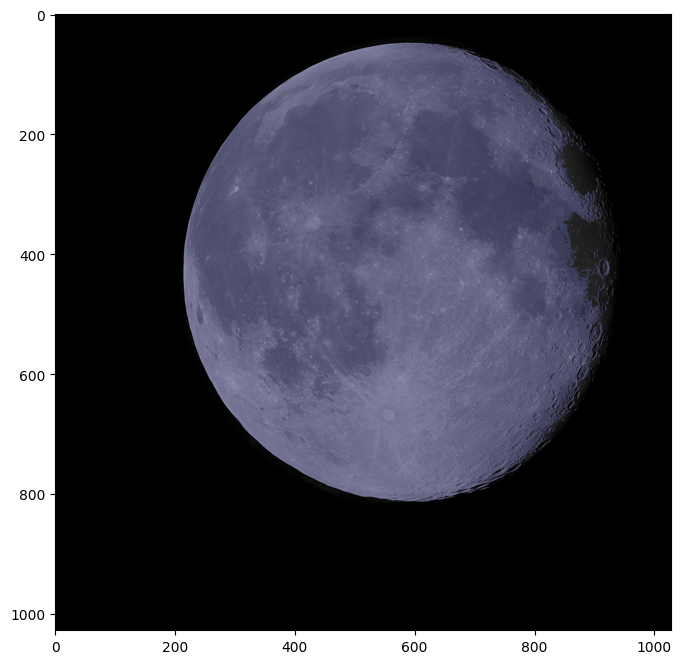

In [34]:
# luminance
moon_lum = cv2.cvtColor(moon, cv2.COLOR_BGR2Lab)[:, :, 0]

# otsu threshold binarization
_, moon_mask = cv2.threshold(
    moon_lum, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

color_mask = np.stack([moon_mask, moon_mask, moon_mask], axis=2)
color_mask[:, :, 0][moon_mask == 255] = 100
color_mask[:, :, 1][moon_mask == 255] = 100

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(moon, cv2.COLOR_BGR2RGB))
plt.imshow(color_mask, alpha=0.2)

It looks like otsu is not doing as well with the fuzzy edge of jupiter, but better with the moon, not perfect though, may need to adjust if it consistently does this? In both cases with is cutting off parts of the object

lets look into the jupiter case

## Heuristic adjustments